** Analysis

In [1]:
# Import dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

In [2]:
# Load Datasets

# Crypto dataset
eth_df = pd.read_csv("Resources/eth_2014.csv")
btc_df = pd.read_csv("Resources/bitcoin_2017.csv")

In [3]:
# Preview Bitcoin CSV and clean
btc_df.head()

# Remove dates earlier than 2017-11-10
btc_df = btc_df.drop(['Adj Close', 'Volume'], axis=1)
btc_df

,Date,Open,High,Low,Close
0,2014-09-18,456.859985,456.859985,413.104004,424.440002
1,2014-09-19,424.102997,427.834991,384.532013,394.795990
2,2014-09-20,394.673004,423.295990,389.882996,408.903992
3,2014-09-21,408.084991,412.425995,393.181000,398.821014
4,2014-09-22,399.100006,406.915985,397.130005,402.152008
...,...,...,...,...,...
3408,2024-01-17,43132.101563,43189.890625,42189.308594,42742.652344
3409,2024-01-18,42742.312500,42876.347656,40631.171875,41262.058594
3410,2024-01-19,41278.460938,42134.160156,40297.457031,41618.406250
3411,2024-01-20,NaN,NaN,NaN,NaN


In [4]:
# Change column names
btc_df = btc_df.rename(columns={'Open': 'BTC Open', 'High': 'BTC High', 'Low': 'BTC Low', 'Close': 'BTC Close'})
btc_df

,Date,BTC Open,BTC High,BTC Low,BTC Close
0,2014-09-18,456.859985,456.859985,413.104004,424.440002
1,2014-09-19,424.102997,427.834991,384.532013,394.795990
2,2014-09-20,394.673004,423.295990,389.882996,408.903992
3,2014-09-21,408.084991,412.425995,393.181000,398.821014
4,2014-09-22,399.100006,406.915985,397.130005,402.152008
...,...,...,...,...,...
3408,2024-01-17,43132.101563,43189.890625,42189.308594,42742.652344
3409,2024-01-18,42742.312500,42876.347656,40631.171875,41262.058594
3410,2024-01-19,41278.460938,42134.160156,40297.457031,41618.406250
3411,2024-01-20,NaN,NaN,NaN,NaN


In [5]:
# Drop null values and set index
btc_df = btc_df.dropna()
btc_df = btc_df.set_index('Date')
btc_df

,BTC Open,BTC High,BTC Low,BTC Close
Date,,,,
2014-09-18,456.859985,456.859985,413.104004,424.440002
2014-09-19,424.102997,427.834991,384.532013,394.795990
2014-09-20,394.673004,423.295990,389.882996,408.903992
2014-09-21,408.084991,412.425995,393.181000,398.821014
2014-09-22,399.100006,406.915985,397.130005,402.152008
...,...,...,...,...
2024-01-16,42499.335938,43566.273438,42085.996094,43154.945313
2024-01-17,43132.101563,43189.890625,42189.308594,42742.652344
2024-01-18,42742.312500,42876.347656,40631.171875,41262.058594


In [6]:
# Preview eth
eth_df.head()

# Remove columns
eth_df = eth_df.drop(['Adj Close', 'Volume'], axis=1)

In [7]:
# Change column names
eth_df = eth_df.rename(columns={'Open': 'ETH Open', 'High': 'ETH High', 'Low': 'ETH Low', 'Close': 'ETH Close'})

# Drop null values
eth_df = eth_df.dropna()

# Reset index
eth_df = eth_df.set_index('Date')
eth_df

,ETH Open,ETH High,ETH Low,ETH Close
Date,,,,
2017-11-10,320.670990,324.717987,294.541992,299.252991
2017-11-11,298.585999,319.453003,298.191986,314.681000
2017-11-12,314.690002,319.153015,298.513000,307.907990
2017-11-13,307.024994,328.415009,307.024994,316.716003
2017-11-14,316.763000,340.177002,316.763000,337.631012
...,...,...,...,...
2024-01-16,2510.627197,2613.566895,2500.003906,2587.691162
2024-01-17,2587.044678,2592.737061,2508.432861,2528.369385
2024-01-18,2528.593262,2546.263916,2426.135498,2467.018799


In [8]:
# Inner merge of crypto DataFrames
crypto_df = pd.merge(btc_df, eth_df, left_index=True, right_index=True, how='inner')

# Change date time formate
crypto_df.index = pd.to_datetime(crypto_df.index)
crypto_df

,BTC Open,BTC High,BTC Low,BTC Close,ETH Open,ETH High,ETH Low,ETH Close
Date,,,,,,,,
2017-11-10,7173.729980,7312.000000,6436.870117,6618.140137,320.670990,324.717987,294.541992,299.252991
2017-11-11,6618.609863,6873.149902,6204.220215,6357.600098,298.585999,319.453003,298.191986,314.681000
2017-11-12,6295.450195,6625.049805,5519.009766,5950.069824,314.690002,319.153015,298.513000,307.907990
2017-11-13,5938.250000,6811.189941,5844.290039,6559.490234,307.024994,328.415009,307.024994,316.716003
2017-11-14,6561.479980,6764.979980,6461.750000,6635.750000,316.763000,340.177002,316.763000,337.631012
...,...,...,...,...,...,...,...,...
2024-01-16,42499.335938,43566.273438,42085.996094,43154.945313,2510.627197,2613.566895,2500.003906,2587.691162
2024-01-17,43132.101563,43189.890625,42189.308594,42742.652344,2587.044678,2592.737061,2508.432861,2528.369385
2024-01-18,42742.312500,42876.347656,40631.171875,41262.058594,2528.593262,2546.263916,2426.135498,2467.018799


In [9]:
# Calculate percentage changes
crypto_df['BTC %Change'] = ((crypto_df['BTC Close'] - crypto_df['BTC Open']) / crypto_df['BTC Open']) * 100
crypto_df['ETH %Change'] = ((crypto_df['ETH Close'] - crypto_df['ETH Open']) / crypto_df['ETH Open']) * 100
crypto_df

,BTC Open,BTC High,BTC Low,BTC Close,ETH Open,ETH High,ETH Low,ETH Close,BTC %Change,ETH %Change
Date,,,,,,,,,,
2017-11-10,7173.729980,7312.000000,6436.870117,6618.140137,320.670990,324.717987,294.541992,299.252991,-7.744783,-6.679120
2017-11-11,6618.609863,6873.149902,6204.220215,6357.600098,298.585999,319.453003,298.191986,314.681000,-3.943574,5.390407
2017-11-12,6295.450195,6625.049805,5519.009766,5950.069824,314.690002,319.153015,298.513000,307.907990,-5.486190,-2.155141
2017-11-13,5938.250000,6811.189941,5844.290039,6559.490234,307.024994,328.415009,307.024994,316.716003,10.461672,3.156423
2017-11-14,6561.479980,6764.979980,6461.750000,6635.750000,316.763000,340.177002,316.763000,337.631012,1.131910,6.587894
...,...,...,...,...,...,...,...,...,...,...
2024-01-16,42499.335938,43566.273438,42085.996094,43154.945313,2510.627197,2613.566895,2500.003906,2587.691162,1.542634,3.069510
2024-01-17,43132.101563,43189.890625,42189.308594,42742.652344,2587.044678,2592.737061,2508.432861,2528.369385,-0.902922,-2.268043
2024-01-18,42742.312500,42876.347656,40631.171875,41262.058594,2528.593262,2546.263916,2426.135498,2467.018799,-3.463205,-2.435127


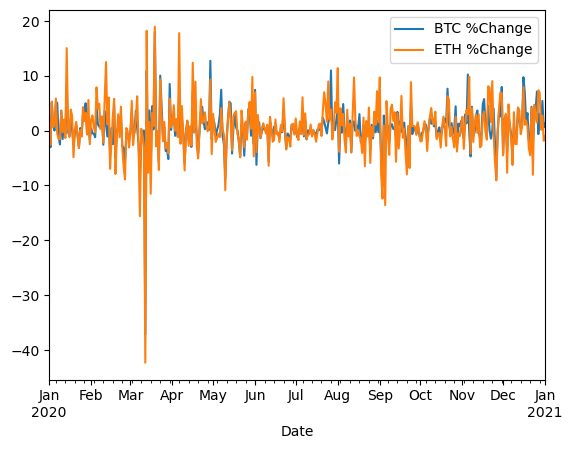

<Figure size 5000x1000 with 0 Axes>

In [10]:
# Set time periods using loc
ax = crypto_df.loc['2020-01-01': '2021-01-01', ['BTC %Change', 'ETH %Change']].plot()
plt.figure(figsize=(50,10))
plt.show()

In [11]:
# Import stock csv
# stocks_df = pd.read_csv(".../stocks_data/sp500_stocks.csv")
# stocks_df

In [ ]:
# Clean data. Handle missing values, format date columns, erase null rows or columns. 
# Standardize the format for date columns (both datasets use the same YYYY-MM-DD format for dates)



#add symbol colum to btc and eth

#merge by date

In [ ]:
# Combine the data into a single dataframe.



** Question 1: What are stock trends in Big Tech before covid (2018), during  COVID (2020) and the present (2024) **

In [ ]:
# Create a subset of the stock data from the years 2018 to 2024.
# Stocks to analize: S&P500, FAANG (Meta, Apple, Amazon, Google)



In [ ]:
# Calculate percentage changes year-over-year for the selected stock data.



In [ ]:
# Create a line plot to visualize stock trends from 2018 to 2024.



In [ ]:
# Plot 1: Line plot showing stock prices over time.



In [ ]:
# Plot 2: Bar chart comparing percentage changes from 2018 to 2024.

In [ ]:
** Question 2: What are trends in the cryptocurrency market before covid (2018), during  COVID (2020) and the present (2024)

In [ ]:
# Create a subset of the cryptocurrency data for 2018 and 2024.



In [ ]:
# Calculate the percentage changes in cryptocurrency values from 2018 to 2024.



In [ ]:
# Create a line plot to visualize cryptocurrency trends.



In [ ]:
# Line plot showing cryptocurrency prices for 2018 and 2024.



In [ ]:
# Bar chart comparing percentage changes between the selected cryptocurrencies.



In [ ]:
** Question 3: What are trends in the Pharma stocks before covid (2018), during  COVID (2020) and the present (2024)

In [ ]:
# Create a subset of pharma companies (Pfizer & Moderna) stock data for 2018 and 2024.



In [ ]:
# Calculate the percentage changes in pharma stock values from 2018 to 2024.



In [ ]:
# # Create a line plot to visualize pharma stock trends.



In [ ]:
# Line plot showing pharma stock prices for 2018 and 2024.



In [ ]:
# Bar chart comparing percentage changes between the selected pharma stocks.



In [ ]:
** Question 4: Are there similarities in trends between the three markets?

In [ ]:
# Create a correlation matrix between stock and cryptocurrency data.
# Merge both datasets on the date column. This ensures that each date has corresponding stock and cryptocurrency values.
# Use an inner join to keep only the dates present in both datasets.



In [ ]:
# Calculate the Correlation Matrix
# Use the .corr() method from pandas to compute the correlation matrix between the stock and cryptocurrency columns.



Analyze correlations and identify patterns between the three markets.



In [ ]:
# Create S\scatter plot of Tech vs. Pharma vs. crypto prices.



In [ ]:
# Create line graph showing correlations between the markets.



In [ ]:
** Question 5: Impact of COVID on Stocks and Cryptos

In [ ]:
# Identify which stocks and cryptocurrencies dropped the most in 2020.

# Subset the Data for Jan 2020 to Dec 2020?

# Determine Percentage Drop or Max drop (express in %)

# Rank Assets by Decline



In [ ]:
# Create Plot 7: chart showing the biggest stock and crypto drops.



In [ ]:
# Create Plot 8: plot 2 ideas.? bar plot?



In [ ]:
# Calculate Recovery Rates for Stocks and Cryptos From jan 2021 to present?

# Subset the Data for jan 2021 to present?

# Calculate Recovery Rates (lowest point vs stock price at the end of subset, present)

# Rank Assets by Recovery

In [ ]:
# Create plot comparing stock and crypto recovery. bar plot?



In [ ]:
# Create chart showing the recovery percentage for selected assets.



In [ ]:
** Question 6: Volatility of Cryptocurrencies. 
** Are cryptocurrencies more prone to extreme price swings than traditional stocks during global events?

In [ ]:
# Calculate the volatility (standard deviation) of selected cryptocurrencies and stocks. ADD variance



In [ ]:
# Create a box plot to show the volatility distribution.



In [ ]:
#  Line plot showing volatility over time.



In [ ]:
** Question 7: Best Investment Pre, During, and Post-COVID